In [1]:
pip install pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.


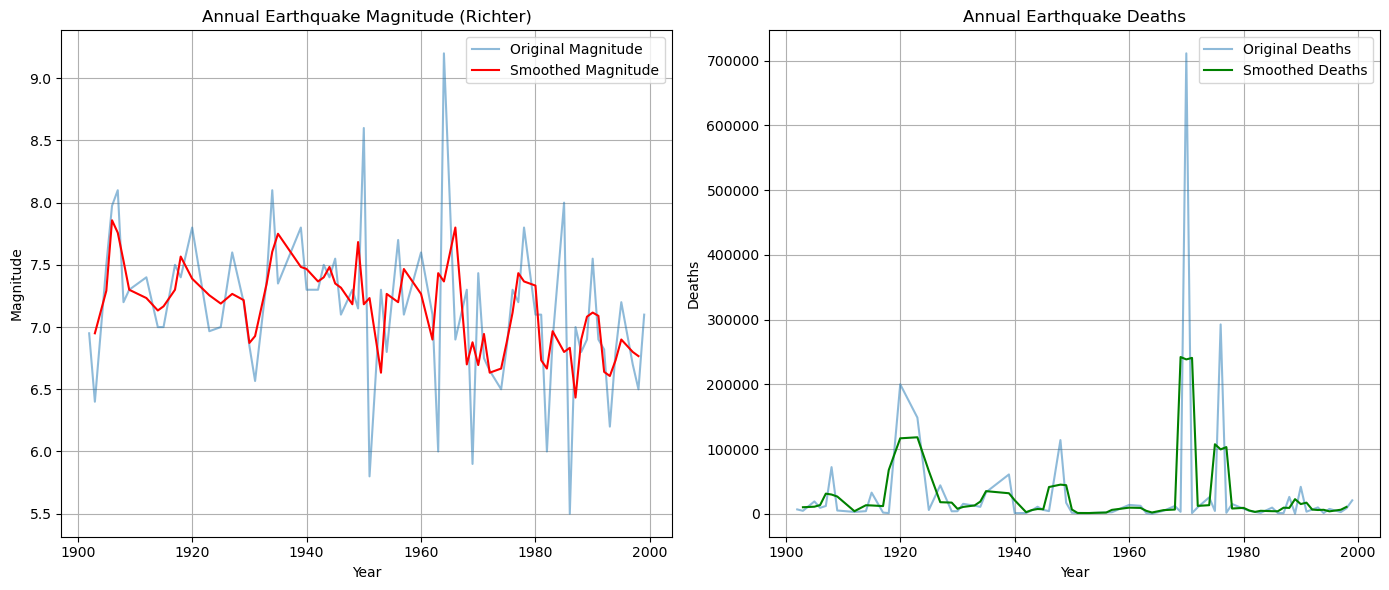

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('earthquakes.csv')  # Replace with the path to your file if needed

# Ensure 'year' is numeric and remove invalid rows
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Aggregate annually: mean magnitude and total deaths per year
annual_data = df.groupby('year').agg({
    'richter': 'mean',
    'deaths': 'sum'
}).reset_index()

# Apply moving average smoothing (3-year window)
window_size = 3
annual_data['richter_smoothed'] = annual_data['richter'].rolling(window=window_size, center=True).mean()
annual_data['deaths_smoothed'] = annual_data['deaths'].rolling(window=window_size, center=True).mean()

# Plotting the results
plt.figure(figsize=(14, 6))

# Subplot for Richter magnitude
plt.subplot(1, 2, 1)
plt.plot(annual_data['year'], annual_data['richter'], label='Original Magnitude', alpha=0.5)
plt.plot(annual_data['year'], annual_data['richter_smoothed'], label='Smoothed Magnitude', color='red')
plt.title('Annual Earthquake Magnitude (Richter)')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Subplot for Deaths
plt.subplot(1, 2, 2)
plt.plot(annual_data['year'], annual_data['deaths'], label='Original Deaths', alpha=0.5)
plt.plot(annual_data['year'], annual_data['deaths_smoothed'], label='Smoothed Deaths', color='green')
plt.title('Annual Earthquake Deaths')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

